In [8]:
# Implements general model from https://stke.sciencemag.org/content/5/217/ra25.long

from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt
import math

nstates = 25
k1 = 4.0739 # AKT_pt308_dephos
k2 = 7.52842 # AKT_pt308_ps473_dephos
k3 = 4.50769 # AKT_pt308_s473_phos_by_mtorc2_ps2481
k4 = 5.90372 # AKT_pt308_s473_phos_by_PDK2
k5 = .699505 # AKT_T308_phos_by_IRS1_phos_PI3K
k6 = .149328 # IR_beta_py1146_dephos
k7 = .0309731 # IR_beta_ready
k8 = .0253763 # IR_beta_Y1146_phosp
k9 = .134664 # IRS1_PI3k_phos_by_IR_beta_py1146
k10 = .00328283 # IRS1_p_pI3K_dephos
k11 = .0001 # IRS1_p_pI3k_phos_by_p70S6K_pT389
k12 = .000100001 # IRS1_pS636_deg
k13 = 1 # IRS1_S636_phos_by_p70S6K_pT389
k14 = .0999968 # IRS1_synthesis
k15 = .99989 # mTorc1_pS2448_dephos_by_TSC
k16 = .0513784 # mTorc1_S2448_activation_AAs
k17 = .0174149 # mTorc2_pS2481_dephos
k18 = .0781585 # mTorc2_s2481_phos
k19 = .00528455 # p70S6K_pT389_dephos
k20 = .00573896 # p70S6K_T389_phos_by_mTorc1_pS2448
k21 = 1 # pdk2_p_dephos
k22 = .1 # pdk2_phos
k23 = .403706 # pras40_ps138_dephos
k24 = .999991 # pras40_pt246_dephos
k25 = .073093 # pras40_s138_phos_by_mtorc1_ps2448
k26 = .0239178 # pras40_t246_phos_by_Akt_pt308
k27 = .000100001 # pras40_t246_phos_by_Akt_pt308_ps473
k28 = .00627315 # tsc_cplx_phos_by_Akt_pt308
k29 = .000100039 # tsc_cplx_phos_by_Akt_pt308_ps473
k30 = .00812537 # tsc_p_cplx_dephos
k35 = .0318902 # mtorc2_s2481_phos_by_unknown
k36 = .0255714 # mtorc2_ps2481_dephos
k37 = .000232165 # unknown_p_dephos
k38 = .999985 # unknown_phos_by_IR_beta_py1146

kaa = 0 
kins = 0

x1 = 144.13 # akt
x2 = 0 # akt_phos
x3 = 0 # akt_phos_phos
x4 = 100 # aas
x5 = 100 # insulin
x6 = 12.1175 # IR_beta
x7 = 0 # IR_beta_phos
x8 = 0 # IR_beta_refract
x9 = 2.965 # IRS1_PI3K
x10 = 0 # IRS1_PI3K_phos
x11 = 0 # IRS1_PI3K_phos
x12 = 4.3225 # mtorc1
x13 = 0 # mtorc1_phos
x14 = 6.2175 # mtorc2
x15 = 0 # mtorc2_phos
x16 = 127.0725 # p70SpK
x17 = 0 # p70SpK_phos
x18 = 12.1175 # PDK2
x19 = 0 # PDK2_phos
x20 = 73.2175 # PRAS40
x21 = 0 # PRAS40_phos
x22 = 0 # PRAS40_phos
x23 = 0 # Sink
x24 = 10 # TSC
x25 = 0 # TSC_phos

def f(t,xin):
    x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25 = xin
    
    x1d = k1*k2-k5*x1*x10
    x2d = k2*x3-k1*x2-k4*x2*x19 + k5*x1*x10-x3*x2*x15
    x3d = -k2*x3 + k4*x2*x19 + k3 * x2*x15
    x4d = kaa
    x5d = kins
    x6d = k7*x8 - k8*x6*x5
    x7d = -k6*x7 + k8*x6*x5
    x8d = k6*x7 - k7*x8
    x9d = k10*x10 + k14*x24 - k13*x9*x17-k9*x9*x7
    x10d = -k11*x10*x17 - k10*x10 + k19*k9*x7
    x11d = k11*x10*x17 - k12*x11 + k13*x9*x17
    x12d = k15 * x13 *x24 - k16*x12*x4
    x13d = -k15*x13*x24 + k16*x12*x4
    x14d = k17*x15 - k18*x14
    x15d = -k17*x15 + k18*x14
    x16d = -k20*x16*x13 + k19*x17
    x17d = k20*x16*x13 - k19*x17
    x18d = -k22*x18*x7 + k21*x19
    x19d = k22*x18*x7 - k21*x19
    x20d = -k27*x20*x3 - k26*x20*x2 + k24*x22 + k23*x21 - k25*x20*x13
    x21d = -k23*x21 + k25*x20*x13
    x22d = k27*x20*x3 + k26*x20*x2 - k24*x22
    x23d = k12*x11-k14*x23
    x24d = k30*x25 - k29*x24*x3 - k28*x24*x2
    x25d = -k30*x25 + k29*x24*x3 + k28*x24*x2
    return [x1d,x2d,x3d,x4d,x5d,x6d,x7d,x8d,x9d,x10d,x11d,x12d,x13d,x14d,x15d,x16d,x17d,x18d,x19d,x20d,x21d,x22d,x23d,x24d,x25d]


In [14]:
r = ode(f, jac=None).set_integrator('dopri5', method='bdf')
r.set_initial_value([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25],0)
t1 = 60
dt = .005
ii = 0
m = np.ones((int(t1/dt*1.1),nstates))
tax = np.ones(int(t1/dt*1.1))
while r.successful() and r.t < t1:
    m[ii,range(nstates)] = r.integrate(r.t+dt)
    tax[ii] = r.t+dt
    ii = ii + 1

tax = tax[:ii]
m = m[:ii]

assert ii == int(t1/dt)

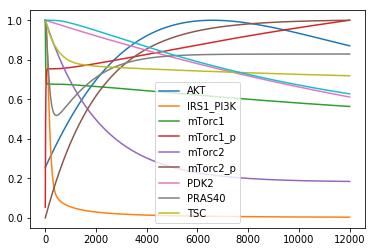

In [15]:
fig,ax=plt.subplots()

pltThese = (0,8,11,12,13,14,15,17,19,23)
pltNames = ('AKT','IRS1_PI3K','mTorc1','mTorc1_p','mTorc2','mTorc2_p','PDK2','PRAS40','TSC')
for ii in pltThese:
    thisOne = m[:,ii]
    thisMax = np.ndarray.max(thisOne)
    if (thisMax > 0):
        thisOne = thisOne/thisMax
    plt.plot(thisOne)
    
plt.legend(pltNames);